In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm_notebook as tqdm

# Path hack.
import sys, os
sys.path.insert(0, os.path.abspath('..'))

from visualization.plots import plot_learning_curves, scrollable_loss_vs_hist, initial_vs_final_overlap, MSD_overlap_plots
from visualization.plot_utils import msd_bin

from sklearn.metrics.pairwise import euclidean_distances, cosine_similarity
import seaborn as sns

plt.style.use('seaborn-darkgrid')

In [2]:
from pathlib import Path
import re

# Train from scratch basic

## Loss vs histogram at sample points

In [3]:
parent_dir = '/home/manu/Projects/dev/weightSymmetry/logs/mnist/1 hidden layer/40 neurons/train_from_scratch/'
run_num = 3

loss_curve = np.load(os.path.join(parent_dir, 'loss_curve_'+str(run_num)+'.npy'))

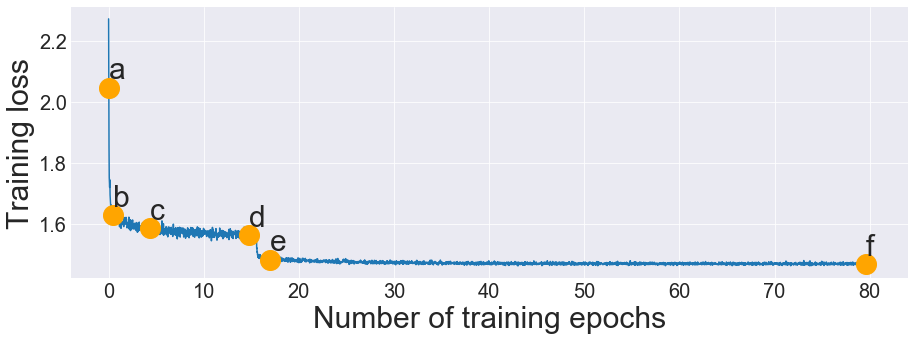

In [4]:
batch_list = [1, 20, 200, 680, 780, 3660]
indices = ['a', 'b', 'c', 'd', 'e', 'f']

plt.figure(figsize=(15,5))
plt.plot(np.arange(0,len(loss_curve))/46, loss_curve)
plt.tick_params(labelsize=20)
for i,j in enumerate(batch_list):
    plt.plot(j/46, loss_curve[j], marker='o', color='orange', markersize=20)
    plt.annotate(indices[i], [j/46, loss_curve[j]+0.03], fontsize=30)
plt.xlabel("Number of training epochs", fontsize=30)
plt.ylabel("Training loss", fontsize=30)

cos_dists = np.load(os.path.join(parent_dir, 'cos_dists_' + str(run_num) + '.npy'))

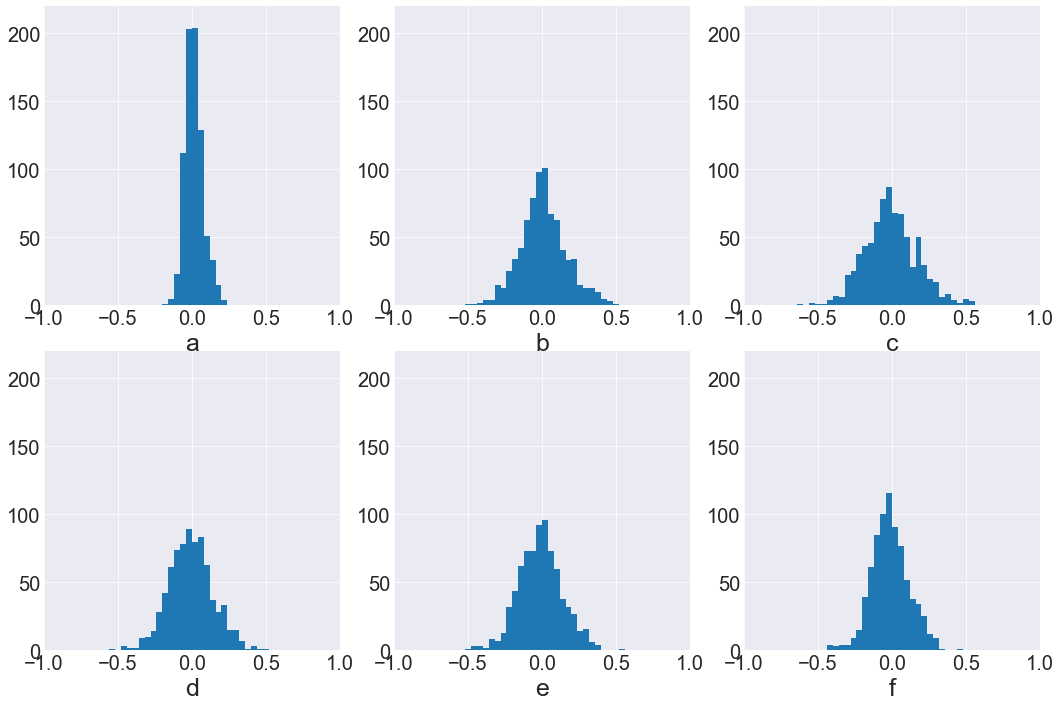

In [5]:
num_neurons = cos_dists.shape[1]
iu2 = np.triu_indices(num_neurons, k=1)

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15,10))
fig.tight_layout(pad=3)

i=0
for row in ax:
    for col in row:
        col.hist(cos_dists[batch_list[i]][iu2], bins=50, range=(-1,1))
        col.set_xlim([-1, 1])
        col.set_ylim([0, 220])
        col.set_xlabel(indices[i], fontsize=25)
        col.tick_params(labelsize=20)
        i += 1

(-0.4, 0.4)

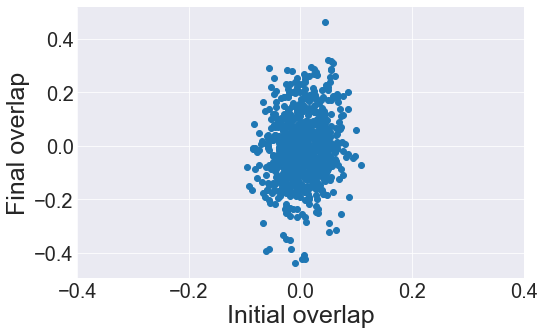

In [6]:
initial_vs_final_overlap(parent_dir, run_num)
plt.xlim([-0.4,0.4])

In [7]:
msd_low, std_msd_low, msd_high, std_msd_high = zip(*[msd_bin(cos_dists, i, population_size=10) for i in range(1, 41)])

In [8]:
msd_low, std_msd_low, msd_high, std_msd_high = zip(*[msd_bin(cos_dists, i, population_size=10) for i in range(1, 41)])

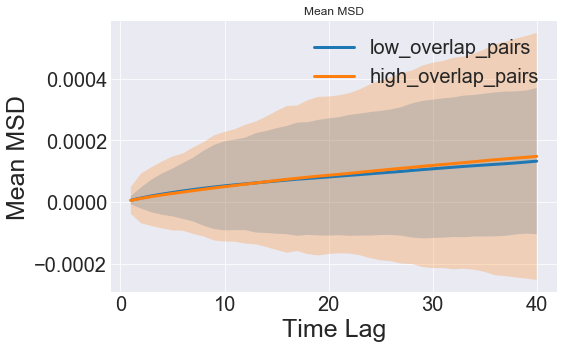

In [9]:
plt.figure(figsize=(8,5))
se_low = np.array(std_msd_low)/np.sqrt(10.0)
se_high = np.array(std_msd_high)/np.sqrt(10.0)

plt.plot(np.arange(1,41), msd_low, label='low_overlap_pairs', linewidth=3)
plt.fill_between(np.arange(1,41), msd_low-se_low, msd_low+se_low, alpha=0.25)

plt.plot(np.arange(1,41), msd_high, label='high_overlap_pairs', linewidth=3)
plt.fill_between(np.arange(1,41), msd_high-se_high, msd_high+se_high, alpha=0.25)

plt.title('Mean MSD')
plt.xlabel('Time Lag', fontsize=25)
plt.ylabel('Mean MSD', fontsize=25)
plt.tick_params(labelsize=20)
plt.legend(fontsize=20)

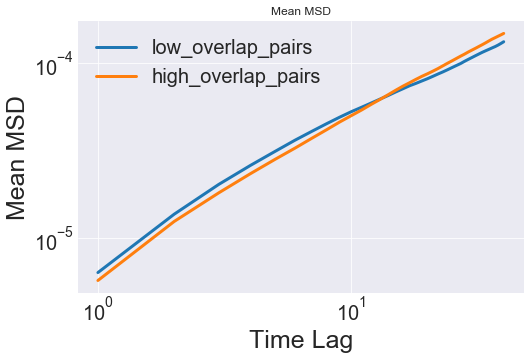

In [10]:
plt.figure(figsize=(8,5))
se_low = np.array(std_msd_low)/np.sqrt(10.0)
se_high = np.array(std_msd_high)/np.sqrt(10.0)

plt.loglog(np.arange(1,41), msd_low, label='low_overlap_pairs', linewidth=3)
# plt.fill_between(np.arange(1,41), msd_low-se_low, msd_low+se_low, alpha=0.25)

plt.loglog(np.arange(1,41), msd_high, label='high_overlap_pairs', linewidth=3)
# plt.fill_between(np.arange(1,41), msd_high-se_high, msd_high+se_high, alpha=0.25)

plt.title('Mean MSD')
plt.xlabel('Time Lag', fontsize=25)
plt.ylabel('Mean MSD', fontsize=25)
plt.tick_params(labelsize=20)
plt.legend(fontsize=20)

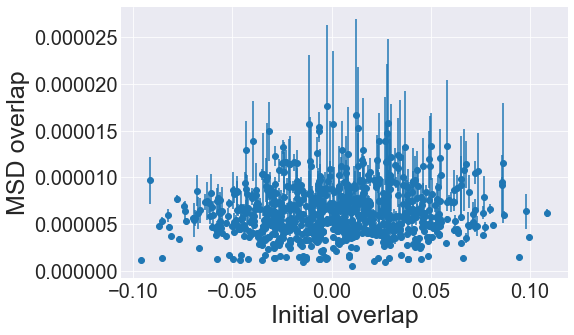

In [11]:
MSD_overlap_plots(parent_dir, run_num)

# Train from scratch bottleneck

## Loss vs histogram at sample points

In [44]:
parent_dir = '/home/manu/Projects/dev/weightSymmetry/logs/mnist/2 hidden layers/500 neurons - OG/train_from_scratch/'
run_num = 2

loss_curve = np.load(os.path.join(parent_dir, 'loss_curve_'+str(run_num)+'.npy'))

IndexError: index 1800 is out of bounds for axis 0 with size 920

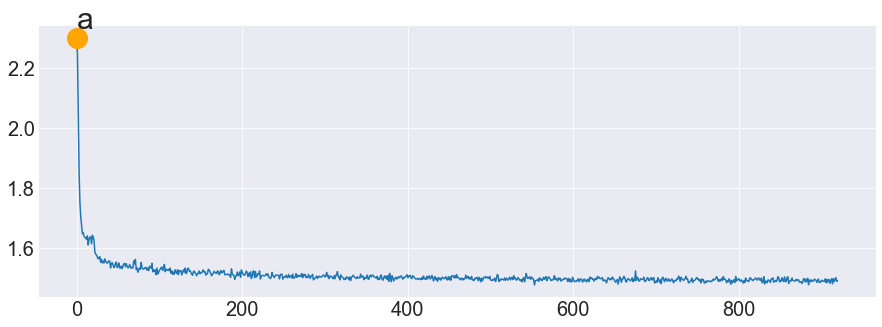

In [45]:
batch_list = [0, 1800, 3600]
indices = ['a', 'b', 'c']

plt.figure(figsize=(15,5))
plt.plot(loss_curve)
plt.tick_params(labelsize=20)
for i,j in enumerate(batch_list):
    plt.plot(j, loss_curve[j], marker='o', color='orange', markersize=20)
    plt.annotate(indices[i], [j, loss_curve[j]+0.03], fontsize=30)
plt.xlabel("Number of training batches seen", fontsize=30)
plt.ylabel("Training loss", fontsize=30)

cos_dists = np.load(os.path.join(parent_dir, 'cos_dists_' + str(run_num) + '.npy'))

IndexError: index 3600 is out of bounds for axis 0 with size 1840

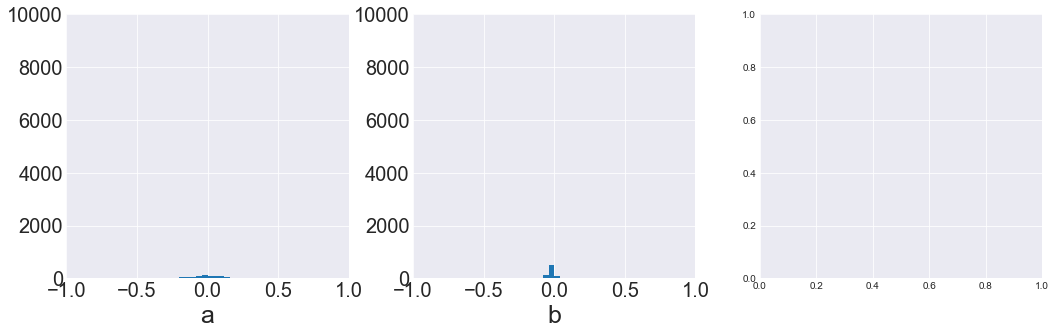

In [46]:
num_neurons = cos_dists.shape[1]
iu2 = np.triu_indices(num_neurons, k=1)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
fig.tight_layout(pad=4)

i=0
for col in ax:
    col.hist(cos_dists[batch_list[i]][iu2], bins=50, range=(-1,1))
    col.set_xlim([-1, 1])
    col.set_ylim([0, 10000])
    col.set_xlabel(indices[i], fontsize=25)
    col.tick_params(labelsize=20)
    i += 1

(-1, 1)

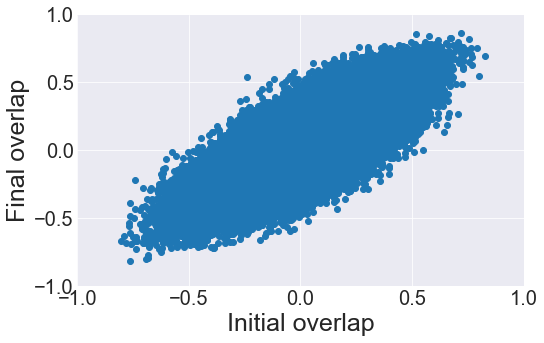

In [47]:
initial_vs_final_overlap(parent_dir, run_num)
plt.xlim([-1,1])
plt.ylim([-1,1])

In [48]:
msd_low, std_msd_low, msd_high, std_msd_high = zip(*[msd_bin(cos_dists, i, population_size=10) for i in range(1, 41)])

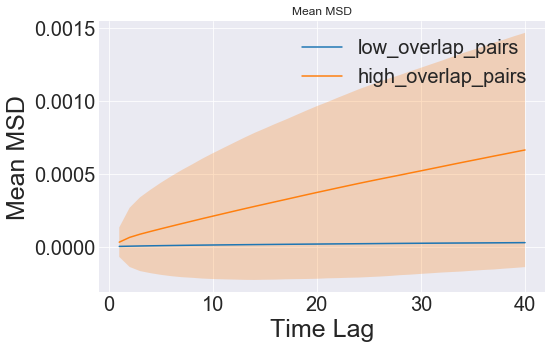

In [49]:
plt.figure(figsize=(8,5))
se_low = np.array(std_msd_low)/10.0
se_high = np.array(std_msd_high)/10.0

plt.plot(np.arange(1,41), msd_low, label='low_overlap_pairs')
plt.fill_between(np.arange(1,41), msd_low-se_low, msd_low+se_low, alpha=0.25)

plt.plot(np.arange(1,41), msd_high, label='high_overlap_pairs')
plt.fill_between(np.arange(1,41), msd_high-se_high, msd_high+se_high, alpha=0.25)

plt.title('Mean MSD')
plt.xlabel('Time Lag', fontsize=25)
plt.ylabel('Mean MSD', fontsize=25)
plt.tick_params(labelsize=20)
plt.legend(fontsize=20)

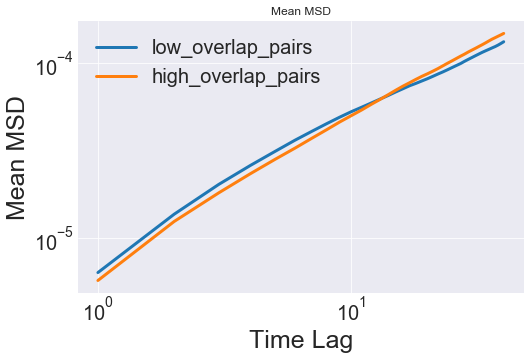

In [14]:
plt.figure(figsize=(8,5))
se_low = np.array(std_msd_low)/np.sqrt(10.0)
se_high = np.array(std_msd_high)/np.sqrt(10.0)

plt.loglog(np.arange(1,41), msd_low, label='low_overlap_pairs', linewidth=3)
# plt.fill_between(np.arange(1,41), msd_low-se_low, msd_low+se_low, alpha=0.25)

plt.loglog(np.arange(1,41), msd_high, label='high_overlap_pairs', linewidth=3)
# plt.fill_between(np.arange(1,41), msd_high-se_high, msd_high+se_high, alpha=0.25)

plt.title('Mean MSD')
plt.xlabel('Time Lag', fontsize=25)
plt.ylabel('Mean MSD', fontsize=25)
plt.tick_params(labelsize=20)
plt.legend(fontsize=20)

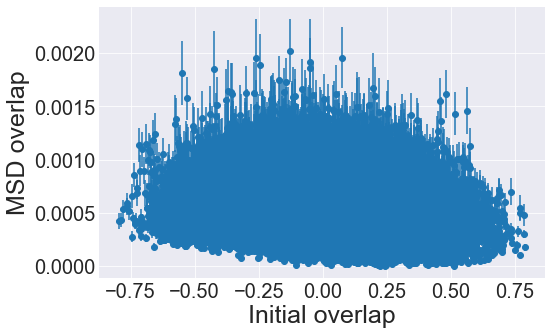

In [15]:
MSD_overlap_plots(parent_dir, run_num)

# Net2WiderNet

## Net2Net at start

In [16]:
parent_dir = '/home/manu/Projects/dev/weightSymmetry/logs/mnist/1 hidden layer/40 neurons/train_from_scratch_net2net_at_start/'
run_num = 1

loss_curve = np.load(os.path.join(parent_dir, 'loss_curve_'+str(run_num)+'.npy'))

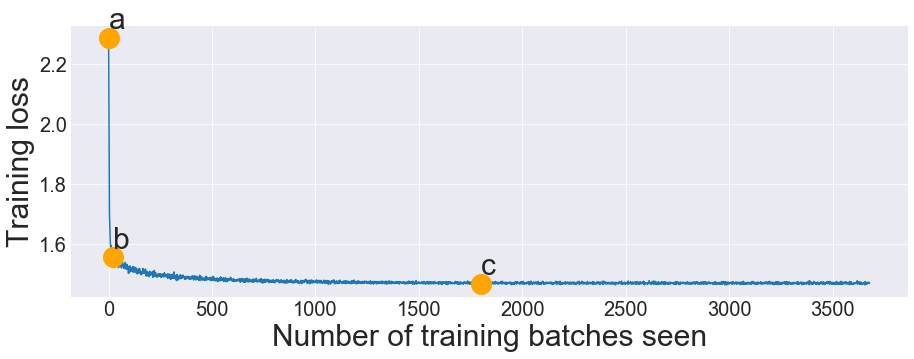

In [17]:
batch_list = [0, 20, 1800]
indices = ['a', 'b', 'c']

offset = 0

plt.figure(figsize=(15,5))
plt.plot(loss_curve)
plt.tick_params(labelsize=20)
for i,j in enumerate(batch_list):
    plt.plot(offset+j, loss_curve[offset+j], marker='o', color='orange', markersize=20)
    plt.annotate(indices[i], [offset+j, loss_curve[offset+j]+0.03], fontsize=30)
plt.xlabel("Number of training batches seen", fontsize=30)
plt.ylabel("Training loss", fontsize=30)

cos_dists = np.load(os.path.join(parent_dir, 'cos_dists_' + str(run_num) + '.npy'))

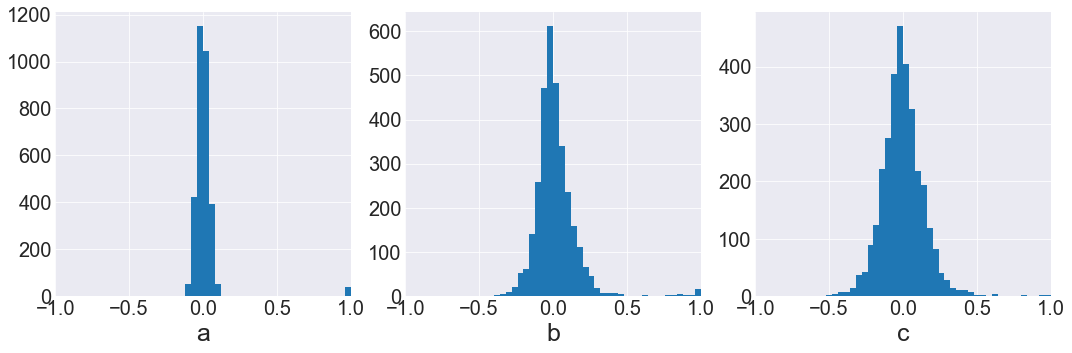

In [18]:
num_neurons = cos_dists.shape[1]
iu2 = np.triu_indices(num_neurons, k=1)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
fig.tight_layout(pad=3)

i=0
for col in ax:
    col.hist(cos_dists[batch_list[i]][iu2], bins=50, range=(-1,1))
    col.set_xlim([-1, 1])
#     col.set_ylim([0, 140])
    col.tick_params(labelsize=20)
    col.set_xlabel(indices[i], fontsize=25)
    i += 1

(-1, 1.1)

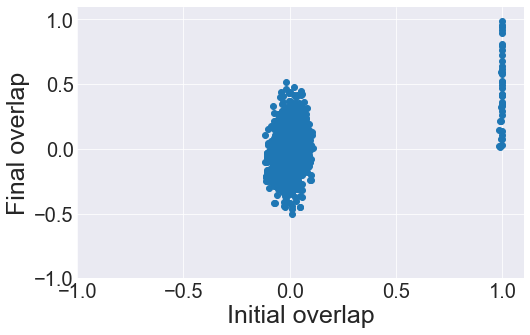

In [19]:
initial_vs_final_overlap(parent_dir, run_num)
plt.xlim([-1,1.1])
plt.ylim([-1,1.1])

In [20]:
msd_low, std_msd_low, msd_high, std_msd_high = zip(*[msd_bin(cos_dists, i, population_size=10) for i in range(1, 41)])

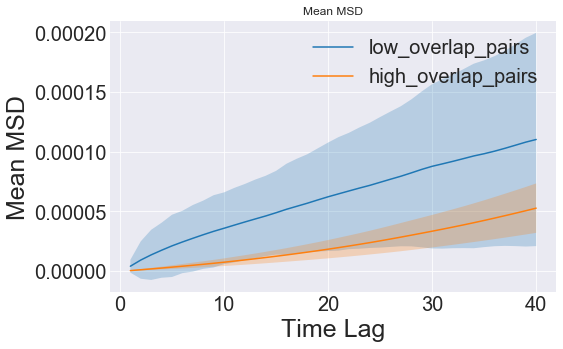

In [21]:
plt.figure(figsize=(8,5))
se_low = np.array(std_msd_low)/10.0
se_high = np.array(std_msd_high)/10.0

plt.plot(np.arange(1,41), msd_low, label='low_overlap_pairs')
plt.fill_between(np.arange(1,41), msd_low-se_low, msd_low+se_low, alpha=0.25)

plt.plot(np.arange(1,41), msd_high, label='high_overlap_pairs')
plt.fill_between(np.arange(1,41), msd_high-se_high, msd_high+se_high, alpha=0.25)

plt.title('Mean MSD')
plt.xlabel('Time Lag', fontsize=25)
plt.ylabel('Mean MSD', fontsize=25)
plt.tick_params(labelsize=20)
plt.legend(fontsize=20)

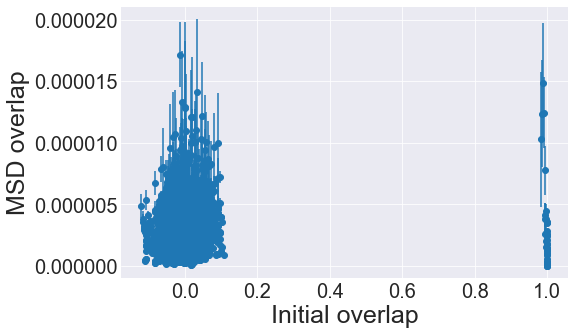

In [22]:
MSD_overlap_plots(parent_dir, run_num)

## Loss vs histogram at sample points for Rotational Noise

In [23]:
parent_dir = '/home/manu/Projects/dev/weightSymmetry/logs/mnist/1 hidden layer/40 neurons/smart_init_rotation_noise_0.64/'
run_num = 0

loss_curve = np.load(os.path.join(parent_dir, 'loss_curve_'+str(run_num)+'.npy'))

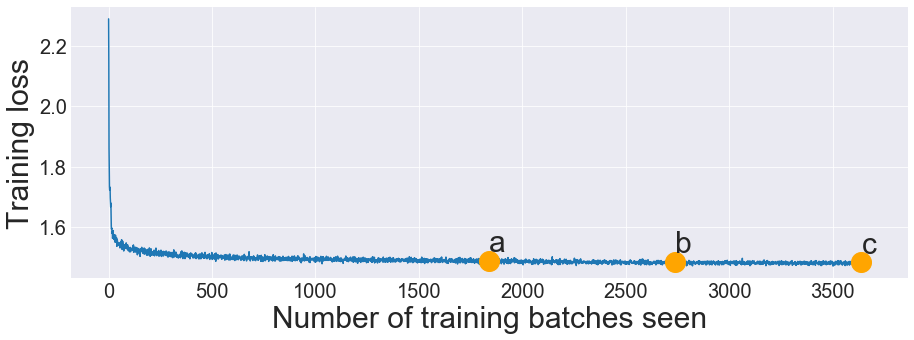

In [24]:
batch_list = [0, 900, 1800]
indices = ['a', 'b', 'c']

offset = 40*46

plt.figure(figsize=(15,5))
plt.plot(loss_curve)
plt.tick_params(labelsize=20)
for i,j in enumerate(batch_list):
    plt.plot(offset+j, loss_curve[offset+j], marker='o', color='orange', markersize=20)
    plt.annotate(indices[i], [offset+j, loss_curve[offset+j]+0.03], fontsize=30)
plt.xlabel("Number of training batches seen", fontsize=30)
plt.ylabel("Training loss", fontsize=30)

cos_dists = np.load(os.path.join(parent_dir, 'cos_dists_' + str(run_num) + '.npy'))

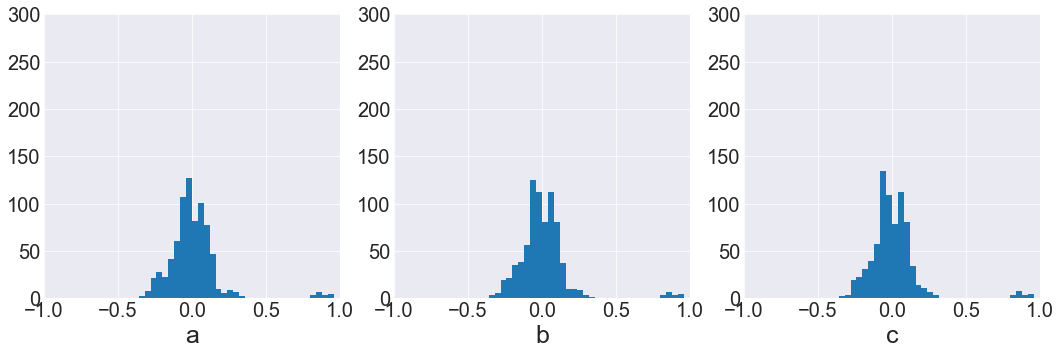

In [25]:
num_neurons = cos_dists.shape[1]
iu2 = np.triu_indices(num_neurons, k=1)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
fig.tight_layout(pad=3)

i=0
for col in ax:
    col.hist(cos_dists[batch_list[i]][iu2], bins=50, range=(-1,1))
    col.set_xlim([-1, 1])
    col.set_ylim([0, 300])
    col.tick_params(labelsize=20)
    col.set_xlabel(indices[i], fontsize=25)
    i += 1

## MSD Overlap

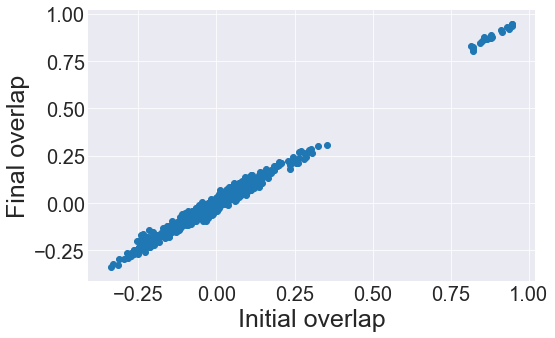

In [26]:
initial_vs_final_overlap(parent_dir, run_num)

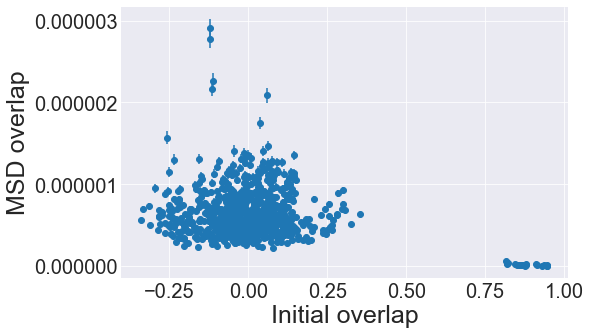

In [27]:
MSD_overlap_plots(parent_dir, run_num)

In [28]:
msd_low, std_msd_low, msd_high, std_msd_high = zip(*[msd_bin(cos_dists, i, population_size=10) for i in range(1, 41)])

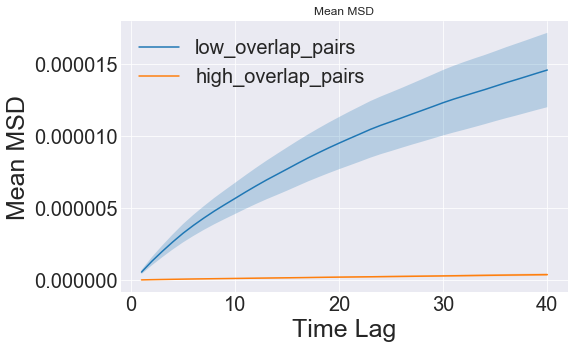

In [29]:
plt.figure(figsize=(8,5))
se_low = np.array(std_msd_low)/10.0
se_high = np.array(std_msd_high)/10.0

plt.plot(np.arange(1,41), msd_low, label='low_overlap_pairs')
plt.fill_between(np.arange(1,41), msd_low-se_low, msd_low+se_low, alpha=0.25)

plt.plot(np.arange(1,41), msd_high, label='high_overlap_pairs')
plt.fill_between(np.arange(1,41), msd_high-se_high, msd_high+se_high, alpha=0.25)

plt.title('Mean MSD')
plt.xlabel('Time Lag', fontsize=25)
plt.ylabel('Mean MSD', fontsize=25)
plt.tick_params(labelsize=20)
plt.legend(fontsize=20)

## Loss vs histogram at sample points for Additive Noise

In [30]:
parent_dir = '/home/manu/Projects/dev/weightSymmetry/logs/mnist/1 hidden layer/40 neurons/smart_init_noise_0.25/'
run_num = 3

loss_curve = np.load(os.path.join(parent_dir, 'loss_curve_'+str(run_num)+'.npy'))

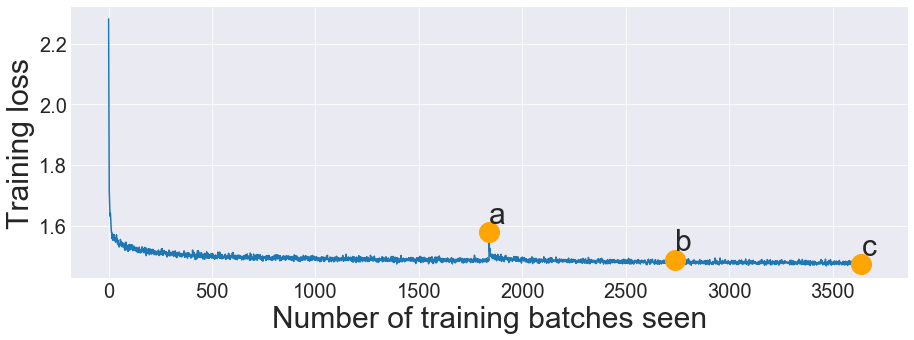

In [31]:
batch_list = [0, 900, 1800]
indices = ['a', 'b', 'c']

offset = 40*46

plt.figure(figsize=(15,5))
plt.plot(loss_curve)
plt.tick_params(labelsize=20)
for i,j in enumerate(batch_list):
    plt.plot(offset+j, loss_curve[offset+j], marker='o', color='orange', markersize=20)
    plt.annotate(indices[i], [offset+j, loss_curve[offset+j]+0.03], fontsize=30)
plt.xlabel("Number of training batches seen", fontsize=30)
plt.ylabel("Training loss", fontsize=30)

cos_dists = np.load(os.path.join(parent_dir, 'cos_dists_' + str(run_num) + '.npy'))

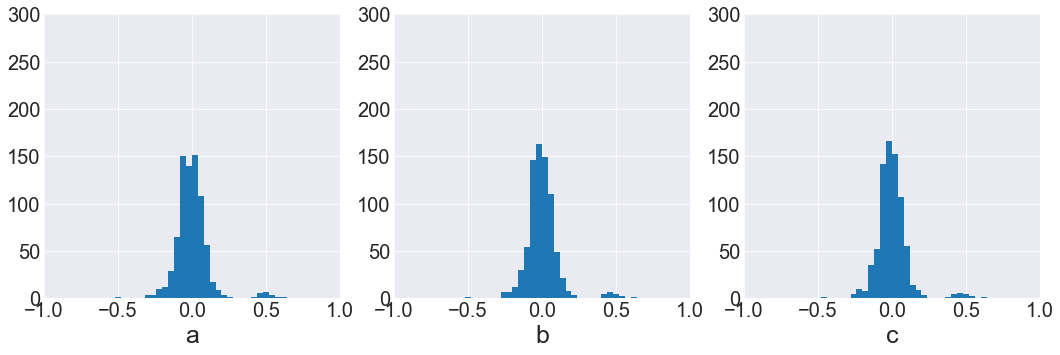

In [32]:
num_neurons = cos_dists.shape[1]
iu2 = np.triu_indices(num_neurons, k=1)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
fig.tight_layout(pad=3)

i=0
for col in ax:
    col.hist(cos_dists[batch_list[i]][iu2], bins=50, range=(-1,1))
    col.set_xlim([-1, 1])
    col.set_ylim([0, 300])
    col.tick_params(labelsize=20)
    col.set_xlabel(indices[i], fontsize=25)
    i += 1

## MSD Overlap

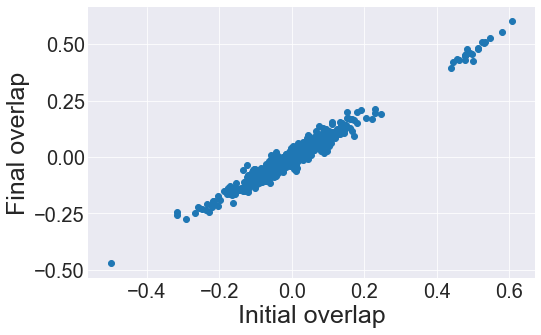

In [33]:
initial_vs_final_overlap(parent_dir, run_num)

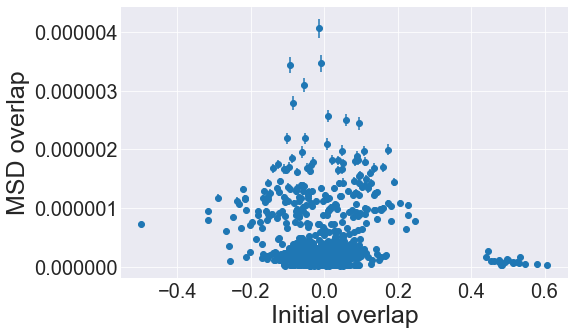

In [34]:
MSD_overlap_plots(parent_dir, run_num)

In [35]:
msd_low, std_msd_low, msd_high, std_msd_high = zip(*[msd_bin(cos_dists, i, population_size=10) for i in range(1, 41)])

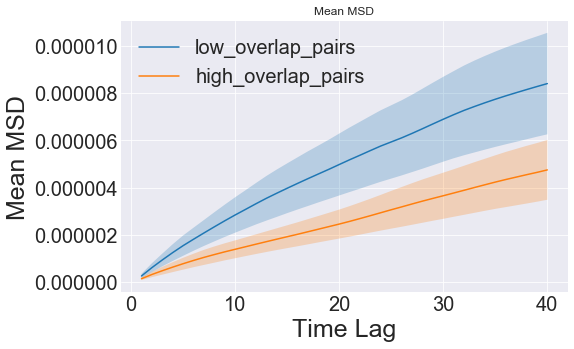

In [36]:
plt.figure(figsize=(8,5))
se_low = np.array(std_msd_low)/10.0
se_high = np.array(std_msd_high)/10.0

plt.plot(np.arange(1,41), msd_low, label='low_overlap_pairs')
plt.fill_between(np.arange(1,41), msd_low-se_low, msd_low+se_low, alpha=0.25)

plt.plot(np.arange(1,41), msd_high, label='high_overlap_pairs')
plt.fill_between(np.arange(1,41), msd_high-se_high, msd_high+se_high, alpha=0.25)

plt.title('Mean MSD')
plt.xlabel('Time Lag', fontsize=25)
plt.ylabel('Mean MSD', fontsize=25)
plt.tick_params(labelsize=20)
plt.legend(fontsize=20)

## Loss vs histogram at sample points for OrthoReg

In [37]:
parent_dir = '/home/manu/Projects/dev/weightSymmetry/logs/mnist/1 hidden layer/40 neurons/smart_init_ortho_reg_rotation_noise_0.64/'
run_num = 0

loss_curve = np.load(os.path.join(parent_dir, 'loss_curve_'+str(run_num)+'.npy'))

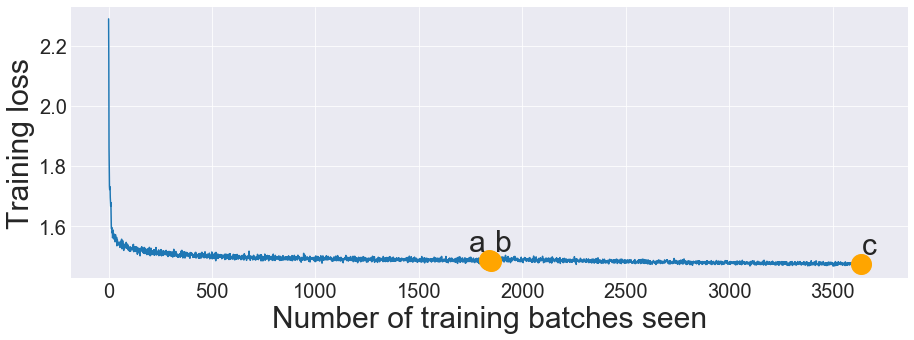

In [38]:
batch_list = [0, 10, 1800]
indices = ['a', 'b', 'c']
offset_visibility_index = [-100, 20, 0]

offset = 40*46

plt.figure(figsize=(15,5))
plt.plot(loss_curve)
plt.tick_params(labelsize=20)
for i,j in enumerate(batch_list):
    plt.plot(offset+j, loss_curve[offset+j], marker='o', color='orange', markersize=20)
    plt.annotate(indices[i], [offset+j+offset_visibility_index[i], loss_curve[offset+j]+0.03], fontsize=30)
plt.xlabel("Number of training batches seen", fontsize=30)
plt.ylabel("Training loss", fontsize=30)

cos_dists = np.load(os.path.join(parent_dir, 'cos_dists_' + str(run_num) + '.npy'))

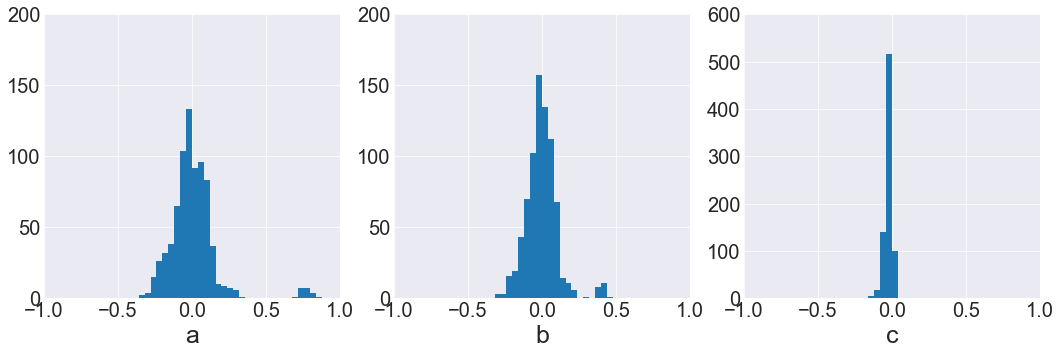

In [39]:
num_neurons = cos_dists.shape[1]
iu2 = np.triu_indices(num_neurons, k=1)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
fig.tight_layout(pad=3)

ylims = [200,200,600]

i=0
for col in ax:
    col.hist(cos_dists[batch_list[i]][iu2], bins=50, range=(-1,1))
    col.set_xlim([-1, 1])
    col.set_ylim([0, ylims[i]])
    col.tick_params(labelsize=20)
    col.set_xlabel(indices[i], fontsize=25)
    i += 1

## MSD Overlap

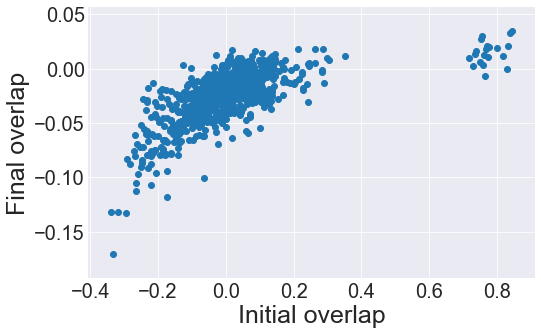

In [40]:
initial_vs_final_overlap(parent_dir, run_num)

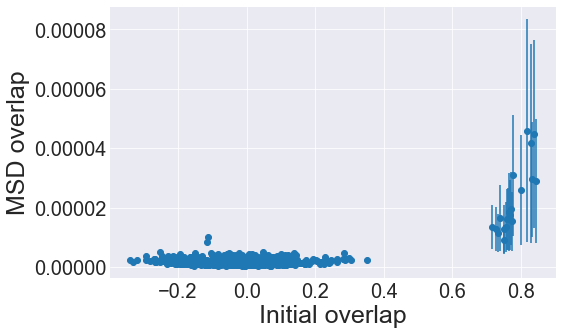

In [41]:
MSD_overlap_plots(parent_dir, run_num)

In [42]:
msd_low, std_msd_low, msd_high, std_msd_high = zip(*[msd_bin(cos_dists, i, population_size=10) for i in range(1, 41)])

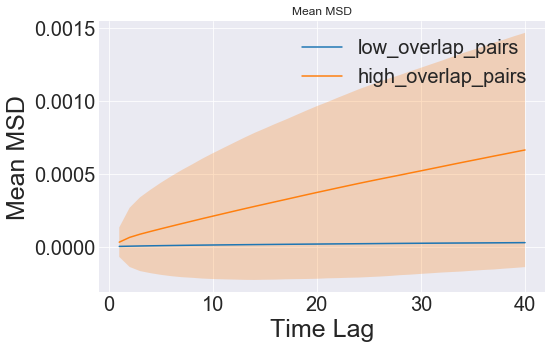

In [43]:
plt.figure(figsize=(8,5))
se_low = np.array(std_msd_low)/10.0
se_high = np.array(std_msd_high)/10.0

plt.plot(np.arange(1,41), msd_low, label='low_overlap_pairs')
plt.fill_between(np.arange(1,41), msd_low-se_low, msd_low+se_low, alpha=0.25)

plt.plot(np.arange(1,41), msd_high, label='high_overlap_pairs')
plt.fill_between(np.arange(1,41), msd_high-se_high, msd_high+se_high, alpha=0.25)

plt.title('Mean MSD')
plt.xlabel('Time Lag', fontsize=25)
plt.ylabel('Mean MSD', fontsize=25)
plt.tick_params(labelsize=20)
plt.legend(fontsize=20)